In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Dense,Input

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [3]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
import sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

print(encoder.classes_)  


['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [5]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [6]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [7]:
# Checking the shape
print(X.shape)
print(Y.shape)

(13611, 16)
(13611,)


In [8]:
Y = np.expand_dims(Y,axis=1)
Y.shape

(13611, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_,y_train,y_ = train_test_split(X,Y,test_size=0.4,random_state=1)

In [11]:
x_train.shape

(8166, 16)

In [12]:
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.5,random_state=1)

In [13]:
x_cv.shape

(2722, 16)

In [14]:
y_test.shape

(2723, 1)

In [15]:
del x_,y_

In [16]:
scaler = StandardScaler()
x_t_s = scaler.fit_transform(x_train)
x_cv_s = scaler.transform(x_cv)
x_test_s = scaler.transform(x_test)

In [17]:
print(x_t_s[:3],'\n')
print(x_cv_s[:3],'\n')
print(x_test_s[:3])

[[-0.87786305 -1.07513792 -1.0600732  -1.10685352 -0.31806713 -0.04047648
  -0.87382827 -1.12286261  0.96752544 -0.64574258  0.12181252  0.22318954
   1.60546328  0.92323021  0.18608998  0.25285213]
 [-0.70394431 -0.89815711 -0.84873687 -0.77719287 -0.42038789 -0.15211383
  -0.70635197 -0.8421408   1.17701078  0.60643034  0.91184254  0.34628759
   0.93856427  0.71206617  0.31158327  0.64025101]
 [-0.39341185 -0.47633452 -0.45541718 -0.30674141 -0.37032794 -0.09659554
  -0.39821582 -0.39084676 -0.73759636  0.71845144  0.77409424  0.2914205
   0.18198271  0.25660686  0.25550456  0.65360993]] 

[[-0.13539414 -0.08902448 -0.1181355   0.00747948 -0.21542392  0.06460245
  -0.13801196 -0.05226917  0.93404127  0.24782724  0.14320704  0.1045119
  -0.21802516 -0.11491837  0.06620693 -0.07019564]
 [ 0.53695233  0.63159203  0.79044139  0.54150342  0.51540115  0.6577136
   0.53020666  0.72371724  0.37569829  0.39999393  0.11577786 -0.59653474
  -0.81580848 -0.90051938 -0.61985339  0.20871801]
 [ 2.

In [18]:
reg_values = [0.001,0.003,0.009,0.01,0.03,0.1,0.33,0.9,1,1.33,10]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

In [20]:
from sklearn.metrics import accuracy_score
import keras

Here, we will try 2 different combinations of neural network architectures to test and see which one's better

In [21]:
for i in range(len(reg_values)):
    model = Sequential([
        Input(shape=(16,)),
        Dense(25,activation='relu',kernel_regularizer = keras.regularizers.l2(reg_values[i])),
        Dense(20,activation='relu',kernel_regularizer = keras.regularizers.l2(reg_values[i])),
        Dense(15,activation='relu',kernel_regularizer = keras.regularizers.l2(reg_values[i])),
        Dense(7,activation='softmax')
    ])
    model.compile(loss = SparseCategoricalCrossentropy(),
                 optimizer = keras.optimizers.Adam(0.01))
    model.fit(x_t_s,y_train,verbose=0,epochs=40)
    yhat = np.argmax(model.predict(x_t_s), axis=1)
    acc = accuracy_score(y_train,yhat)
    print(f"for lambda =  {reg_values[i]}, training accuracy is: "+ f"{acc}")
    yhat = np.argmax(model.predict(x_cv_s), axis=1)
    acc = accuracy_score(y_cv,yhat)
    print(f"for lambda =  {reg_values[i]}, CV accuracy is: "+ f"{acc}")
    

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.001, training accuracy is: 0.9244428116580945
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.001, CV accuracy is: 0.9180749448934606
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.003, training accuracy is: 0.9239529757531227
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.003, CV accuracy is: 0.9202792064658339
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.009, training accuracy is: 0.914033798677443
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.009, CV accuracy is: 0.9107274063188832
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.01, training accuracy is: 0.9219936321332354
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.01, CV accuracy is: 0.9184423218221895
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.03, training accuracy is: 0.8994611805045309
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.03, CV accuracy is: 0.9008082292432035
256/256 ━━━━━━━

In [22]:
for i in range(len(reg_values)):
    model = Sequential([
    Input(shape=(16,)),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_values[i])),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_values[i])),
    Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_values[i])),
    Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(reg_values[i])),
    Dense(7, activation='softmax')
])

    model.compile(loss = SparseCategoricalCrossentropy(),
                 optimizer = keras.optimizers.Adam(0.01))
    model.fit(x_t_s,y_train,verbose=0,epochs=40)
    yhat = np.argmax(model.predict(x_t_s), axis=1)
    acc = accuracy_score(y_train,yhat)
    print(f"for lambda =  {reg_values[i]}, training accuracy is: "+ f"{acc}")
    yhat = np.argmax(model.predict(x_cv_s), axis=1)
    acc = accuracy_score(y_cv,yhat)
    print(f"for lambda =  {reg_values[i]}, CV accuracy is: "+ f"{acc}")

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.001, training accuracy is: 0.9175851089884889
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.001, CV accuracy is: 0.9081557678177811
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.003, training accuracy is: 0.9264021552779819
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.003, CV accuracy is: 0.922850844966936
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.009, training accuracy is: 0.9091354396277247
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.009, CV accuracy is: 0.9004408523144747
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.01, training accuracy is: 0.9181974038697036
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.01, CV accuracy is: 0.9099926524614255
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
for lambda =  0.03, training accuracy is: 0.9003183933382317
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
for lambda =  0.03, CV accuracy is: 0.8949301983835415
256/256 ━━━━━━━

Thus, we got a good result using the second architecture with regularization param = 0.03 
Let's take this forward

In [23]:
best_model = Sequential([
    Input(shape=(16,)),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.03)),
    Dense(7, activation='softmax')
])
best_model.compile(loss = SparseCategoricalCrossentropy(),
                 optimizer = keras.optimizers.Adam(0.01))
best_model.fit(x_t_s,y_train,verbose=0,epochs=40)
yhat = np.argmax(best_model.predict(x_t_s), axis=1)
acc = accuracy_score(y_train,yhat)
print(f" Training accuracy is: "+ f"{acc}")
yhat = np.argmax(best_model.predict(x_cv_s), axis=1)
acc = accuracy_score(y_cv,yhat)
print(f" CV accuracy is: "+ f"{acc}")
yhat = np.argmax(best_model.predict(x_test_s),axis=1)
acc=accuracy_score(y_test,yhat)
print(f" Test accuracy is: "+ f"{acc}")

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 Training accuracy is: 0.8957874112172423
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 CV accuracy is: 0.8901542983100661
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 Test accuracy is: 0.8975394785163423


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       254
           1       1.00      1.00      1.00       109
           2       0.91      0.88      0.90       337
           3       0.90      0.92      0.91       707
           4       0.97      0.91      0.94       378
           5       0.92      0.90      0.91       409
           6       0.81      0.88      0.84       529

    accuracy                           0.90      2723
   macro avg       0.91      0.90      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[213   0  13   0   0   8  20]
 [  0 109   0   0   0   0   0]
 [ 32   0 297   0   1   0   7]
 [  0   0   0 647   3   8  49]
 [  0   0  15   5 345   0  13]
 [  0   0   0  22   0 369  18]
 [  0   0   0  43   8  14 464]]


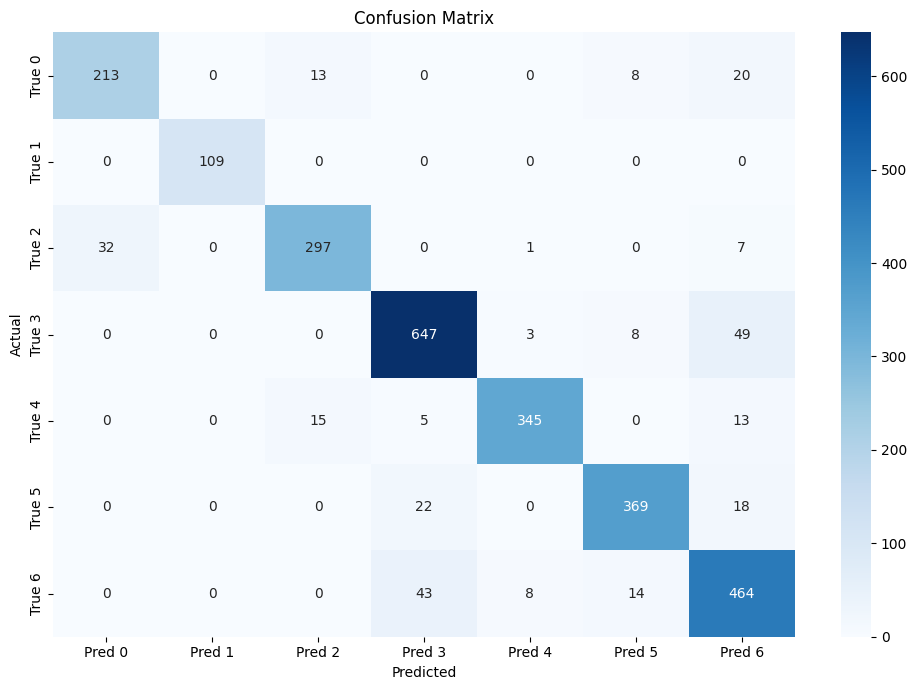

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Pred {i}' for i in range(7)],
            yticklabels=[f'True {i}' for i in range(7)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

**The results indicate that the machine learning model is well-trained and generalizes effectively to unseen data.**